In [ ]:
!pip install librosa tensorflow matplotlib

In [ ]:
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np

# Load the data
X_train = np.loadtxt("/content/drive/My Drive/DeepLearning/code/dataset/train_data.csv", delimiter=",")
X_test = np.loadtxt("/content/drive/My Drive/DeepLearning/code/dataset/test_data.csv", delimiter=",")
y_train = np.loadtxt("/content/drive/My Drive/DeepLearning/code/dataset/train_labels.csv", delimiter=",")
y_test = np.loadtxt("/content/drive/My Drive/DeepLearning/code/dataset/test_labels.csv", delimiter=",")
X_val = np.loadtxt("/content/drive/My Drive/DeepLearning/code/dataset/x_val.csv", delimiter=",")
y_val = np.loadtxt("/content/drive/My Drive/DeepLearning/code/dataset/y_val.csv", delimiter=",")


In [ ]:
# Define the model
def create_model(input_shape):
    model = models.Sequential()
    model.add(layers.Dense(256, activation='relu', input_shape=(input_shape,)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(2, activation='softmax'))  # 2 output neurons for binary classification (scream or non-scream)

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
from sklearn.metrics import classification_report

def evaluate_model(model, X_test, y_test):
    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'Test loss: {loss:.4f}')
    print(f'Test accuracy: {accuracy:.4f}')

    # Predict the classes for the test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Generate classification report
    class_report = classification_report(y_true, y_pred_classes)
    print("Classification Report:")
    print(class_report)


Epoch 1/50
88/88 [==============================] - 3s 9ms/step - loss: 442.3584 - accuracy: 0.6349 - val_loss: 42.0038 - val_accuracy: 0.7200
Epoch 2/50
88/88 [==============================] - 1s 7ms/step - loss: 138.5319 - accuracy: 0.6421 - val_loss: 13.2501 - val_accuracy: 0.7200
Epoch 3/50
88/88 [==============================] - 0s 5ms/step - loss: 79.9134 - accuracy: 0.6435 - val_loss: 4.0420 - val_accuracy: 0.6886
Epoch 4/50
88/88 [==============================] - 1s 8ms/step - loss: 46.9901 - accuracy: 0.6396 - val_loss: 1.0173 - val_accuracy: 0.6743
Epoch 5/50
88/88 [==============================] - 0s 4ms/step - loss: 30.7746 - accuracy: 0.6385 - val_loss: 1.0838 - val_accuracy: 0.7200
Epoch 6/50
88/88 [==============================] - 0s 4ms/step - loss: 16.7583 - accuracy: 0.6263 - val_loss: 0.7266 - val_accuracy: 0.6314
Epoch 7/50
88/88 [==============================] - 0s 4ms/step - loss: 10.4954 - accuracy: 0.6389 - val_loss: 0.6426 - val_accuracy: 0.6800
Epoch 8/5

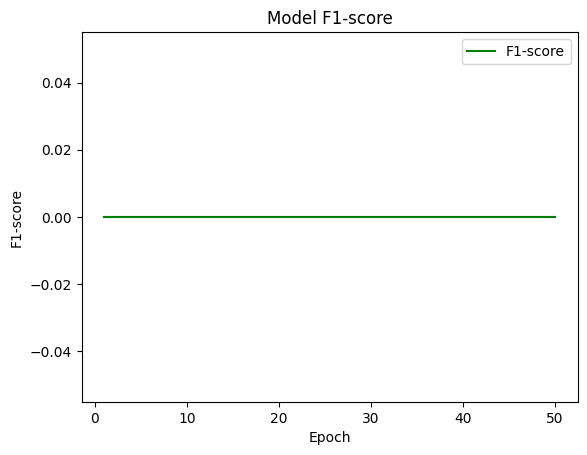

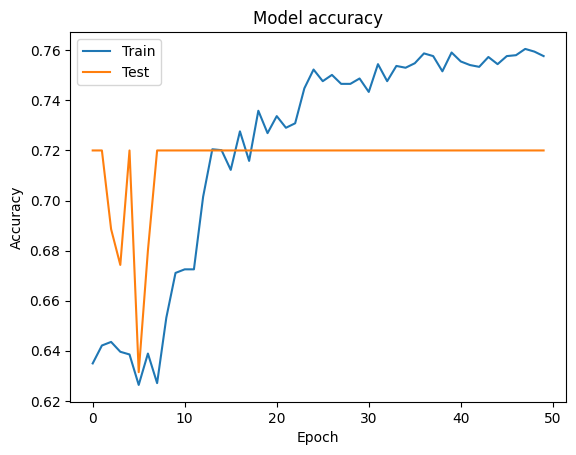

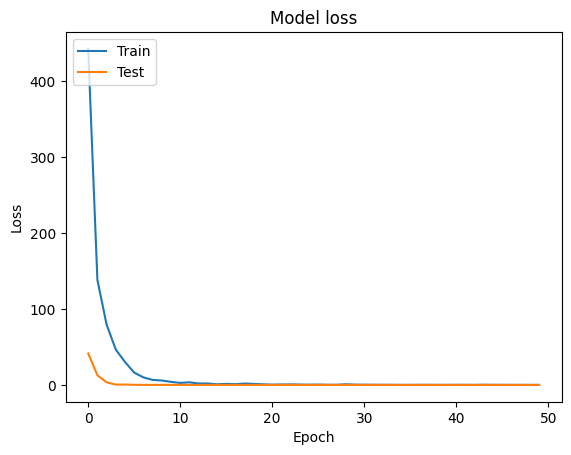

11/11 [==============================] - 0s 3ms/step - loss: 0.5988 - accuracy: 0.7200
Test loss: 0.5988
Test accuracy: 0.7200
11/11 [==============================] - 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.72      1.00      0.84       252
           1       0.00      0.00      0.00        98

    accuracy                           0.72       350
   macro avg       0.36      0.50      0.42       350
weighted avg       0.52      0.72      0.60       350



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Training the model
def train_model(X_train, y_train, X_test, y_test, epochs=50, batch_size=32):
    input_shape = X_train.shape[1]
    model = create_model(input_shape)

    # Callbacks for early stopping and model checkpoint
    # early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_test, y_test))
    # history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
    #                     validation_data=(X_test, y_test), callbacks=[early_stopping])

    # Calculate F1-score for each epoch
    f1_scores = []
    for epoch in range(1, epochs+1):
        y_pred = model.predict(X_test)
        y_pred_classes = np.argmax(y_pred, axis=1)
        f1 = f1_score(np.argmax(y_test, axis=1), y_pred_classes)
        f1_scores.append(f1)

    # Plot F1-score
    plt.plot(range(1, epochs+1), f1_scores, label='F1-score', color='green')
    plt.title('Model F1-score')
    plt.xlabel('Epoch')
    plt.ylabel('F1-score')
    plt.legend()
    plt.show()
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    return model, history
model, history = train_model(X_train, y_train, X_test, y_test)
evaluate_model(model, X_test, y_test)

## Plot the ROC
Now plot the ROC. This plot is useful because it shows, at a glance, the range of performance the model can reach by tuning the output threshold over its full range (0 to 1). So each point corresponds to a single value of the threshold.

Training Performance: The training accuracy is gradually increasing, which indicates that the model is learning from the training data. However, the training loss is still relatively high, suggesting that the model may be struggling to fit the training data properly. This could be due to various factors such as model complexity, optimization algorithm, or insufficient training data.

Validation Performance: The validation accuracy is stable around 72%, which is the same as the accuracy achieved on the test set. However, the validation loss is relatively high, indicating that the model may be overfitting to some extent. Overfitting occurs when the model learns to memorize the training data rather than generalize well to unseen data.

Class Imbalance: The classification report shows that the model performs well in predicting the majority class (0 - not screaming) but poorly in predicting the minority class (1 - screaming). This is evident from the low precision, recall, and F1-score for the minority class. Since your dataset is imbalanced (2600 not screaming files vs. 800 screaming files), the model may be biased towards the majority class.

F1-score: The F1-score is an important metric to consider, especially for imbalanced datasets, as it provides a balanced measure of precision and recall. In this case, the F1-score for the minority class is 0, indicating that the model fails to correctly classify instances of the minority class.